In [1]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import cv2
import imghdr
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model


2024-02-01 17:39:38.649673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [81]:

class Trainer:
    def __init__(self, data_set_train, data_set_test):
        self.data_set = data_set_train
        self.train = 0
        self.val = 0
        self.test = data_set_test
        self.model = Sequential()
        self.history = 0
    
    def group_data(self, training, validation):
        train_size = int(len(self.data_set)*.7)
        val_size = int(len(self.data_set)*.3)
        
        self.train = self.data_set.take(train_size)
        self.val = self.data_set.skip(train_size).take(val_size)

    def save_classes(self, path):
        # Directory containing the dataset
        dataset_directory = path

        # Get a list of subdirectories (each subdirectory represents a class)
        class_directories = [d for d in os.listdir(dataset_directory) if os.path.isdir(os.path.join(dataset_directory, d))]

        # Save the class names to the 'classes' attribute
        self.classes = class_directories

        print("Classes saved:", self.classes)
        
    def build_neural_network_layers(self):
  
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
        self.model.add(MaxPooling2D((2, 2)))
        
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D((2, 2)))
        
        self.model.add(Conv2D(128, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D((2, 2)))
        
        # Flatten layer
        self.model.add(Flatten())
        
        # Dense layers
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(8, activation='softmax'))  # Output layer with 8 classes, softmax activation
        
        # Compile the model
        self.model.compile(optimizer='adam',
                    loss='categorical_crossentropy',  # Categorical cross-entropy loss for multi-class classification
                    metrics=['accuracy'])


    def start(self, epoch):
        self.history = self.model.fit(self.train, epochs=epoch, validation_data=self.val)
    def save(self, path):
        self.model.save(os.path.join('models','imageclassifier.h5'))
        
    def plot_history(self):
        # plot loss
        fig = plt.figure()
        plt.plot(self.history.history['loss'], color='teal', label='loss')
        plt.plot(self.history.history['val_loss'], color='orange', label='val_loss')
        fig.suptitle('Loss', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()
        # plot accuracy
        fig = plt.figure()
        plt.plot(self.history.history['accuracy'], color='teal', label='accuracy')
        plt.plot(self.history.history['val_accuracy'], color='orange', label='val_accuracy')
        fig.suptitle('Accuracy', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()
        
    def testing(self):
        pre = Precision()
        re = Recall()
        acc = BinaryAccuracy()
        for batch in self.test.as_numpy_iterator(): 
            X, y = batch
            yhat = self.model.predict(X)
            pre.update_state(y, yhat)
            re.update_state(y, yhat)
            acc.update_state(y, yhat)
        print(pre.result(), re.result(), acc.result())


In [ ]:
    training_data = tf.keras.utils.image_dataset_from_directory('augmented_datasets_train_transformed')
    testing_data = tf.keras.utils.image_dataset_from_directory('augmented_datasets_validation')
    data_set = training_data.as_numpy_iterator()
    data_set_testing = testing_data.as_numpy_iterator()
    testing_data.as_numpy_iterator()
    d = training_data.as_numpy_iterator()
    batch = d.next()

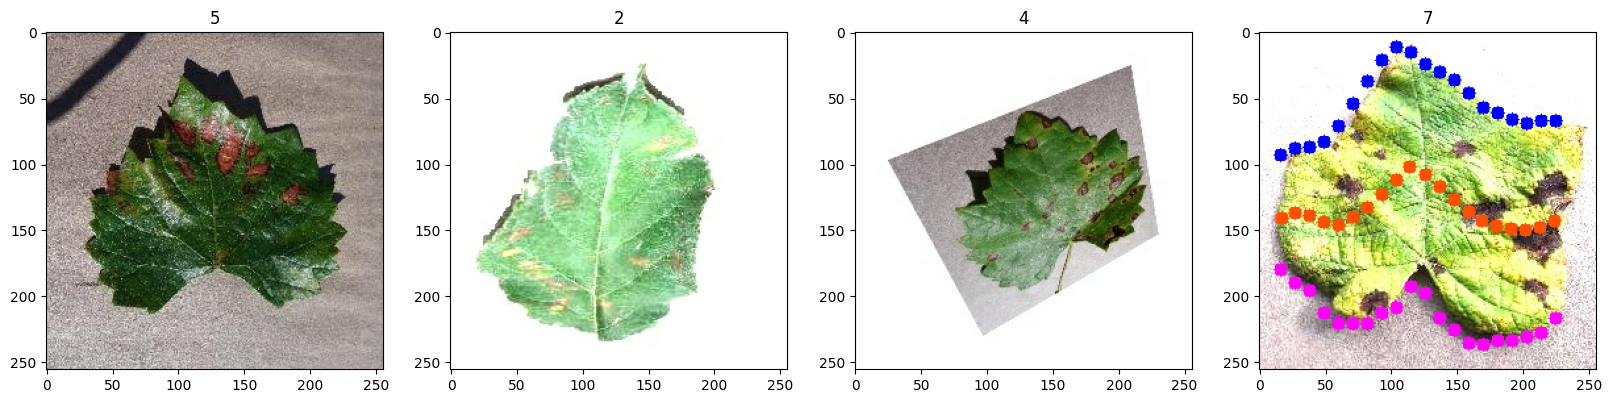

In [83]:
    fig, ax = plt.subplots(ncols=4, figsize=(20,20))

    for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batch[1][idx])

In [84]:
    training_data = training_data.map(lambda x, y: (x / 255, tf.one_hot(y, depth=8)))  # One-hot encoding labels
    testing_data = testing_data.map(lambda x, y: (x / 255, tf.one_hot(y, depth=8)))      # One-hot encoding labels
  

In [85]:
trainer = Trainer(training_data, testing_data)
trainer.save_classes('augmented_datasets_train_transformed')


Classes saved: ['Grape_Esca', 'Grape_healthy', 'Apple_scab', 'Grape_Black_rot', 'Apple_healthy', 'Grape_spot', 'Apple_rust', 'Apple_Black_rot']


In [86]:
trainer.group_data(7, 2)


In [87]:
trainer.build_neural_network_layers()

In [98]:
trainer.start(5)

Epoch 1/5
173/173 [==============================] - 238s 1s/step - loss: 0.9716 - accuracy: 0.6463 - val_loss: 0.9384 - val_accuracy: 0.6854
Epoch 2/5
173/173 [==============================] - 250s 1s/step - loss: 0.5720 - accuracy: 0.7939 - val_loss: 0.6599 - val_accuracy: 0.7783
Epoch 3/5
173/173 [==============================] - 245s 1s/step - loss: 0.2838 - accuracy: 0.9008 - val_loss: 0.6753 - val_accuracy: 0.7796
Epoch 4/5
173/173 [==============================] - 253s 1s/step - loss: 0.1630 - accuracy: 0.9440 - val_loss: 0.6824 - val_accuracy: 0.7863
Epoch 5/5
173/173 [==============================] - 249s 1s/step - loss: 0.0848 - accuracy: 0.9734 - val_loss: 0.7880 - val_accuracy: 0.7952


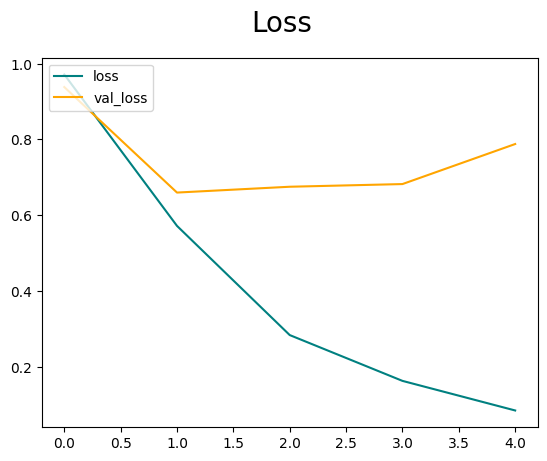

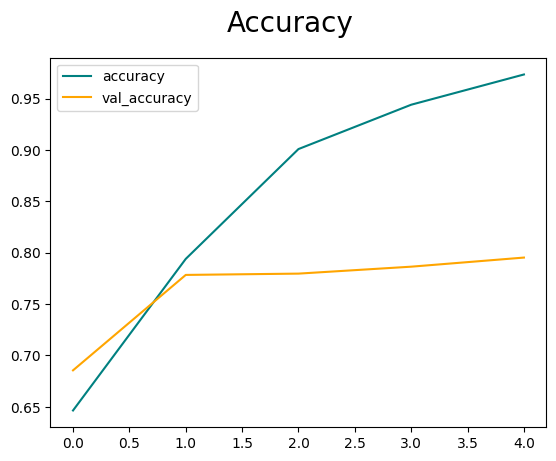

In [99]:
trainer.plot_history()

In [100]:
trainer.history.history

{'loss': [0.9715757966041565,
  0.5719978213310242,
  0.28384989500045776,
  0.1629544049501419,
  0.08483260124921799],
 'accuracy': [0.6463150382041931,
  0.7938945293426514,
  0.9008309245109558,
  0.9440028667449951,
  0.9734465479850769],
 'val_loss': [0.9383981227874756,
  0.6599324941635132,
  0.6752943396568298,
  0.6823511123657227,
  0.7880361080169678],
 'val_accuracy': [0.6853885054588318,
  0.7782939076423645,
  0.7795608043670654,
  0.7863175868988037,
  0.7951858043670654]}

In [101]:
trainer.save("path")

In [102]:
#  now to test the model

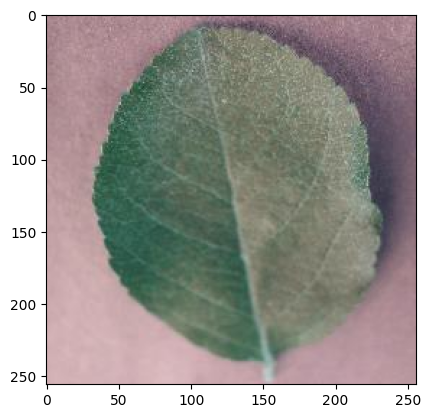

In [108]:
img = cv2.imread('augmented_datasets_validation/Apple_healthy/image (1).JPG')
plt.imshow(img)
plt.show()

In [121]:
yhat = trainer.model.predict(np.expand_dims(img/255, 0))


1/1 [==============================] - 0s 30ms/step


In [122]:
yhat

array([[0.02035489, 0.69962126, 0.1317886 , 0.09324895, 0.02235451,
        0.01230134, 0.01792998, 0.00240046]], dtype=float32)

In [123]:
predicted_index = np.argmax(yhat)
predicted_class = trainer.classes[predicted_index]

In [124]:
predicted_class

'Grape_healthy'